In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string


In [6]:
import warnings
warnings.filterwarnings('ignore')


In [7]:
data = pd.read_csv(r"./train.csv", delimiter=";")
data

,ID,review_content,review_title,review_stars,product,Target
0,0,En appelant un acheteur pour demander si l'écr...,La Police s'inscrit en acheteur privé sur Pric...,5,2fbb619e3606f9b7c213e858a109cda771aa2c47ce50d5...,0
1,1,"Alors, là, on a affaire au plus grand Navet ja...",Chef D'Oeuvre Absolu en vue...,5,7b56d9d378d9e999d293f301ac43d044cd7b4786d09afb...,1
2,2,Effet garanti sur la terrase. Ils donnent immé...,Effet garanti sur la terrase. Ils donnent immé...,3,7b37bf5dcb2fafd9229897910318a7dfa11a04ca36893c...,0
3,3,tres bon rapport qualite prix tre pratique en ...,bon produit,4,77d2dbd504b933ab3aaf7cb0cd81c22f7c3549012f4f88...,1
4,4,Ordinateur de bureau trés bien pour quelqu'un ...,Apple Power MAC G4,3,f574512e7d2dd1dd73c7f8f804bf16f14c932c5651a01b...,1
...,...,...,...,...,...,...
59995,59995,"Bonjour, je suis intereser par votre annonce e...",moto,5,675ebad7919f00b9cb4adb1469054240d8c76018dc27d2...,1
59996,59996,Voline nous raconte en détail un aspect beauco...,Un témoignage fort contre l'oubli,4,a15a274f7d11ed085c745246bb078098e501198956eeeb...,1
59997,59997,D'une bonne matière flexible ce double saura s...,Double plaisir,5,32a26794184ba74118c581b1659e85c2133227e18e97c2...,1
59998,59998,très bien pour compléter des collections de fè...,tres bien,5,018af320f0b08e59032011e0bbc68d42f9486833c0482e...,1


In [8]:
data.dtypes

ID                 int64
review_content    object
review_title      object
review_stars       int64
product           object
Target             int64
dtype: object

In [9]:
data = data.drop(columns=["product"])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              60000 non-null  int64 
 1   review_content  60000 non-null  object
 2   review_title    59997 non-null  object
 3   review_stars    60000 non-null  int64 
 4   Target          60000 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 2.3+ MB


In [11]:
print(data["review_stars"].value_counts())
for i in range(1, 6):
    print(f"Proportion de {i} étoiles :", data["review_stars"].value_counts()[i]/len(data))

review_stars
5    38405
4    11307
3     4586
1     3895
2     1807
Name: count, dtype: int64
Proportion de 1 étoiles : 0.06491666666666666
Proportion de 2 étoiles : 0.030116666666666667
Proportion de 3 étoiles : 0.07643333333333334
Proportion de 4 étoiles : 0.18845
Proportion de 5 étoiles : 0.6400833333333333


In [12]:
print(data["Target"].value_counts())
print("proportion de 0 : ", data["Target"].value_counts()[0]/len(data))
print("proportion de 1 : ", data["Target"].value_counts()[1]/len(data))

Target
1    33291
0    26709
Name: count, dtype: int64
proportion de 0 :  0.44515
proportion de 1 :  0.55485


<Axes: >

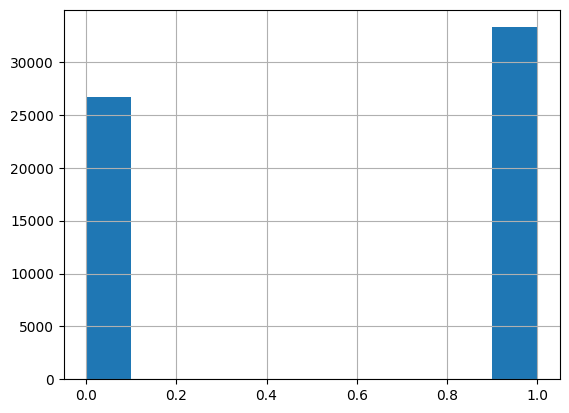

In [13]:
data["Target"].hist()

(array([ 3895.,  1807.,  4586., 11307., 38405.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. ]),
 <BarContainer object of 5 artists>)

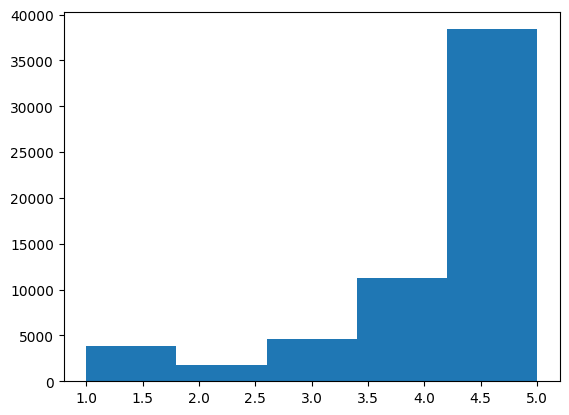

In [14]:
plt.hist(data["review_stars"], bins=5)

TODO : 
- engineer les données pour extraire des features syntaxiques
- split de manière élégante et réfléchie
- contrsuire un modèle dessus
- ne pas toucher à l'échantillon test


In [15]:

def syntaxic_feature_engineer(df, label):
    x = df
    x["nb_phrases"] = [len(x) for x in df["review_content"]]

def classify_sentence(sentence):
    sentence = sentence.strip()
    
    if sentence.endswith('!'):
        return 0 # exclamatory
    
    elif sentence.endswith('?'):
        return 1 #interogative
    
    elif sentence[0].lower() in ['c', 'g', 'm', 't', 's', 'h', 'w', 'l', 'p', 'b', 'r', 'f', 'd', 'o', 'a', 'e', 'k']:
        return 2 # imperative
    
    return 3

def detect_sentiment(sentence):
    sentence = sentence.lower()
    
    likes = ['like', 'love', 'enjoy', 'appreciate']
    dislikes = ['dislike', 'hate', 'detest', 'not like', "don't like"]

    negation = any(neg_word in sentence for neg_word in ["not", "don't", "doesn't", "isn't", "aren't", "never"])

    for word in likes:
        if word in sentence:
            return 1 if not negation else -1 #return like else dislike

    for word in dislikes:
        if word in sentence:
            return -1 if not negation else 1 #return dislike else like

    return 0

In [16]:
def engineer_column(df, label):
    symbols = ["!", "?", ":(", "TT", "-_-"]
    x = df
    x[label] = x[label].astype(str)
    x[f"{label}_length"] = df[label].apply(lambda x: len(x.split(" ")))
    x[f"{label}_nb_punc"] = df[label].apply(lambda x: sum(1 for char in x if char in symbols))
    x[f"{label}_type"] = df[label].apply(lambda x: classify_sentence(x))
    x[f"{label}_sentiment"] = df[label].apply(lambda x: detect_sentiment(x))

    return x    

In [17]:
data = engineer_column(data, "review_title")
data = engineer_column(data, "review_content")

In [18]:
data

,ID,review_content,review_title,review_stars,Target,review_title_length,review_title_nb_punc,review_title_type,review_title_sentiment,review_content_length,review_content_nb_punc,review_content_type,review_content_sentiment
0,0,En appelant un acheteur pour demander si l'écr...,La Police s'inscrit en acheteur privé sur Pric...,5,0,8,0,2,0,62,0,2,0
1,1,"Alors, là, on a affaire au plus grand Navet ja...",Chef D'Oeuvre Absolu en vue...,5,1,5,0,2,0,179,25,0,0
2,2,Effet garanti sur la terrase. Ils donnent immé...,Effet garanti sur la terrase. Ils donnent immé...,3,0,17,0,2,0,31,0,2,0
3,3,tres bon rapport qualite prix tre pratique en ...,bon produit,4,1,2,0,2,0,18,0,2,0
4,4,Ordinateur de bureau trés bien pour quelqu'un ...,Apple Power MAC G4,3,1,4,0,2,0,21,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,59995,"Bonjour, je suis intereser par votre annonce e...",moto,5,1,1,0,2,0,19,1,1,0
59996,59996,Voline nous raconte en détail un aspect beauco...,Un témoignage fort contre l'oubli,4,1,5,0,3,0,83,0,3,0
59997,59997,D'une bonne matière flexible ce double saura s...,Double plaisir,5,1,2,0,2,0,12,0,2,0
59998,59998,très bien pour compléter des collections de fè...,tres bien,5,1,2,0,2,0,13,0,2,0


In [19]:
data["review_content_sentiment"].value_counts()

review_content_sentiment
 0    59847
 1       99
-1       54
Name: count, dtype: int64

# Splitting the dataset

In [20]:
from sklearn.model_selection import train_test_split

y = data["Target"]
X = data.drop(columns=["Target", "review_title", "review_content"])
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, shuffle=True, random_state=42)

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

kfold = KFold(n_splits=5, random_state=42, shuffle=True)
clf = DecisionTreeClassifier(random_state=0, max_depth=100).fit(x_train, y_train)
cross_val_score(clf, x_val, y_val, cv=kfold)

y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.49      0.49      0.49      8009
           1       0.59      0.58      0.59      9991

    accuracy                           0.54     18000
   macro avg       0.54      0.54      0.54     18000
weighted avg       0.54      0.54      0.54     18000



In [22]:
dt_classifier = DecisionTreeClassifier()

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 6, 8]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=dt_classifier, 
                           param_grid=param_grid, 
                           scoring='accuracy', 
                           cv=5, 
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_val)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

df = pd.read_csv(r"./train.csv", delimiter=";")

df['review_title'] = df['review_title'].fillna('')  # Handle NaN values
df['combined'] = df['review_content'] + ' ' + df['review_title']
df = df.sort_values(['combined', 'review_stars'], ascending=[True, False]).drop_duplicates('combined', keep='first')

df['content_length'] = df['review_content'].str.len()
df['title_length'] = df['review_title'].str.len()

df_sorted = df.sort_values(['review_title', 'content_length', 'title_length', 'review_stars'], 
                           ascending=[True, False, False, False])

# Split the data
X = df_sorted.drop('Target', axis=1)
y = df_sorted['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

Training set size: 43660
Test set size: 10916


In [24]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

def create_syntactic_features(df):
    df['word_count'] = df['review_content'].str.split().str.len()
    df['char_count'] = df['review_content'].str.len()
    df['avg_word_length'] = df['char_count'] / df['word_count']
    df['sentence_count'] = df['review_content'].str.count('\.')
    df['uppercase_count'] = df['review_content'].str.count(r'[A-Z]')
    return df

X_train = create_syntactic_features(X_train)
X_test = create_syntactic_features(X_test)

pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', LogisticRegression())
])

param_grid = {
    'vectorizer__max_features': [1000, 3000, 5000, 10000]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train['review_content'], y_train)

print(f"Best parameters: {grid_search.best_params_}")

best_model = grid_search.best_estimator_
y_pred_proba = best_model.predict_proba(X_test['review_content'])[:, 1]

auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC score with best model: {auc}")

Best parameters: {'vectorizer__max_features': 1000}
AUC score with best model: 0.6269865172554048
